18


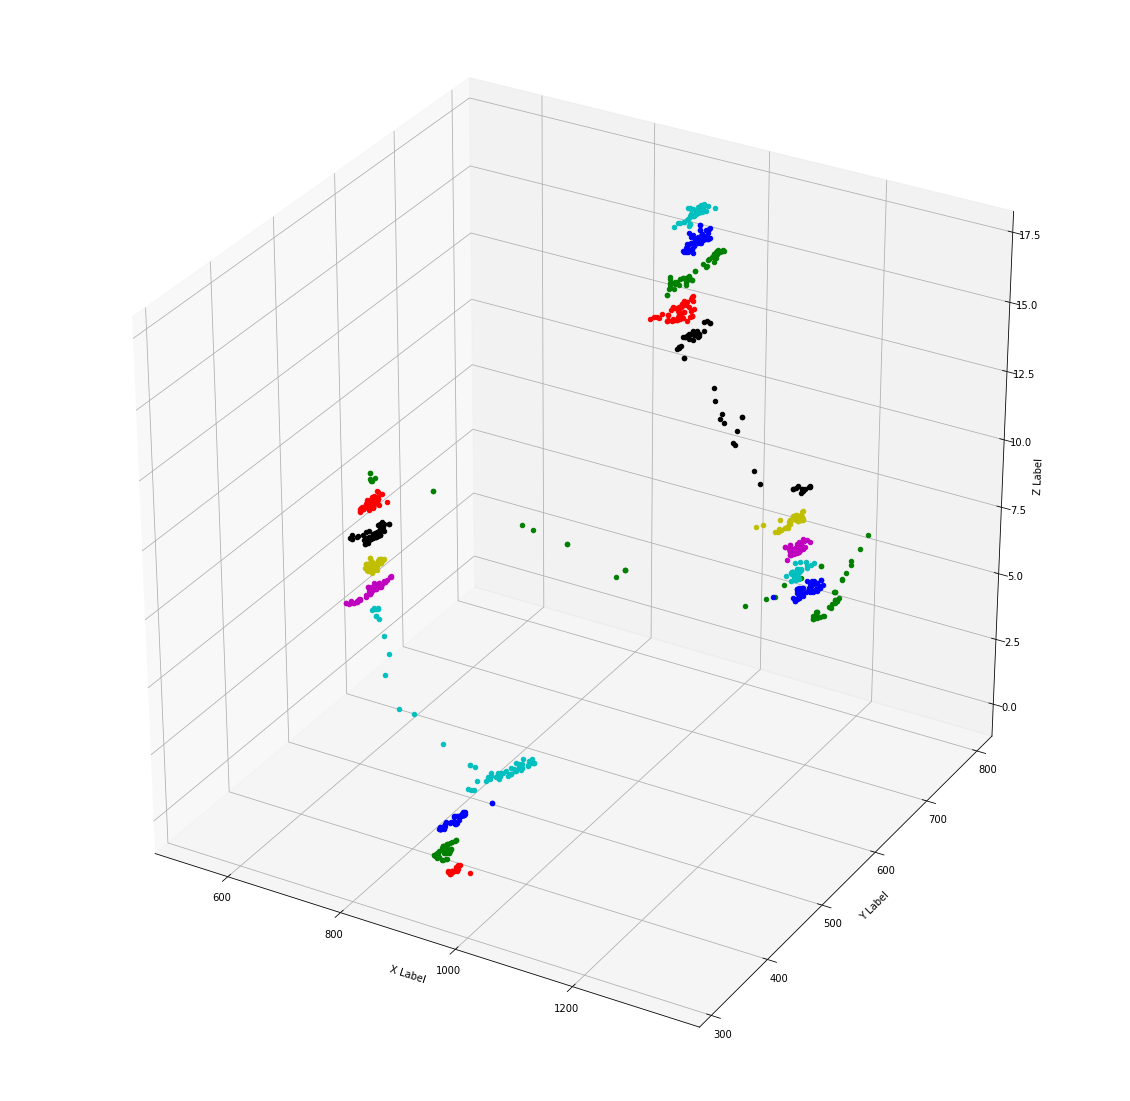

In [13]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#IVT Thhold
v_threshold = 1000.0
#multi
other = 1
#epsil
eps = 80

#dataname='analysis_d1_sb.csv'
#dataname='eval_D1_mg.csv'
#dataname='eval_D1_sb.csv'
#dataname='eval_D1_sm.csv'
#dataname='eval_D1_sy.csv'

#dataname='eval_A1_dk.csv'
#dataname='eval_A1_sb.csv'
#dataname='eval_A1_sy.csv'

#dataname='eval_B1_mg.csv'
#dataname='eval_B1_sb.csv'
#dataname='eval_B1_sy.csv'

#dataname='eval_E5_dk.csv'
#dataname='eval_E5_mg.csv'
#dataname='eval_E5_sb.csv'
#dataname='eval_E5_sm.csv'

#img = plt.imread("A1.png")
#img = plt.imread("B1.png")
#img = plt.imread("D1.png")
#img = plt.imread("E5.png")

#dataname='PG18-2.csv'

dataname='ev20-3-10.csv'
img = plt.imread("ev2020c.png")

df = pd.read_csv(dataname,sep=",", dtype={'x':float,'y':float,'timecount':float},header=None,names=["no","userid","timestamp","timecount","x","y"])

temp_tc =df['timecount']
#df['timecount']=df['timecount'].multiply(other = 30) 
df['timecount']=df['timecount']-df['timecount'][0]
df = df.drop(columns=['no', 'userid', 'timestamp'])

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1,1,1, projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
current_t = -1
cmap = ['r','g','b','c','m','y','k']
asc = -1
count=0
for index, row in df.iterrows():
    if current_t!=row['timecount']:
        current_t=row['timecount']
        asc=(asc+1)%7
        count+=1
    ax.scatter(row['x'], row['y'], row['timecount'], c=cmap[asc], marker='o')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
print(count)


In [14]:
#ece k.t.
import numpy as np
import pandas as pd
import sys
import gaze as g
import csv
import time
import datetime

                                   
df = pd.read_csv(dataname,sep=",", dtype={'x':float,'y':float,'timecount':float},header=None,names=["no","userid","timestamp","timecount","x","y"])

data = np.array(df)
user_ids = np.unique(data[:,g.user_id])

#textW_file = open(fixations, "w")
#textW_file.write("%s" % ("x,y,start_time,finish_timeid,fixlist\n"))


for u in user_ids:
    for q in range(1,2):
        sub_data = data
        sub2d = np.asarray(sub_data).reshape(len(sub_data),6) #this is a numpy array

        centroidsX, centroidsY, time0, time1, fixList, r_fixations = g.ivt(sub2d,v_threshold)

        #print len(centroidsX), len(centroidsY), len(time0),len(time1)
        #cue = q%2 #gaze cue 1 in odd-numbered questions, 0 otherwise       
#        print(fixations)
#        print(len(fixations))
        #for r in range(len(centroidsX)):
#            textW_file.write("%s,%s,%s,%s,%s,%s\n" % (str(centroidsX[r]), str(centroidsY[r]), str(time0[r]), str(time1[r]), str(u),str(fixList[r])))
        #print len(fixList)

Tdata = {'X':centroidsX,'Y':centroidsY,'Time':time0}
 
# Create DataFrame
df_IVT = pd.DataFrame(Tdata)
print(r_fixations)
print()
print("FIX CLUSTER LEN : " + str(len(r_fixations)))
print(df_IVT)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

In [15]:
# remove fixation: one gaze point
onePointFixation = []
remFixIndex = []
fixations = r_fixations

#index=0
#for _f in r_fixations:
#    if len(_f) < 3:
#        #print(_f)
#        onePointFixation.append(_f)
#        remFixIndex.append(index)
#    index+=1

fixations = []
for _f in r_fixations:
    _pts = []
    for _p in _f:
        _pts.append(_p)
    fixations.append(_pts)
#print(remFixIndex)
print(fixations)

#print(remFixIndex)
#print(onePointFixation)
#print()
#r_fixations = np.delete(r_fixations, remFixIndex)
#print(fixations)
#print(r_fixations)

#fixations = []
#for _f in r_fixations:
#    _pts = []
#    for _p in _f:
#        _pts.append(_p)
#    fixations.append(_pts)
#print(fixations)

#print(len(fixations))
print()

print(r_clusters)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

counter:
Counter({0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1})

n_clusters_:
7
[array([[719.128211  , 474.70315996,  22.45022124]]), array([[654.430146, 581.701647,  45.1     ]]), array([[647.924524  , 421.88469125,  33.975     ]]), array([[914.758818, 557.042376,  45.5     ]]), array([[772.87107375, 406.70938375,  34.275     ]]), array([[1029.828864,  527.102806,   45.9     ]]), array([[1155.11321094,  628.1781241 ,   73.91847247]])]

clusters:
[[array([719.128211  , 474.70315996,  22.45022124])], [array([654.430146, 581.701647,  45.1     ])], [array([647.924524  , 421.88469125,  33.975     ])], [array([914.758818, 557.042376,  45.5     ])], [array([772.87107375, 406.70938375,  34.275     ])], [array([1029.828864,  527.102806,   45.9     ])], [array([1155.11321094,  628.1781241 ,   73.91847247])]]
len(clusters):
7

[[0], [1], [2], [3], [4], [5], [6]]


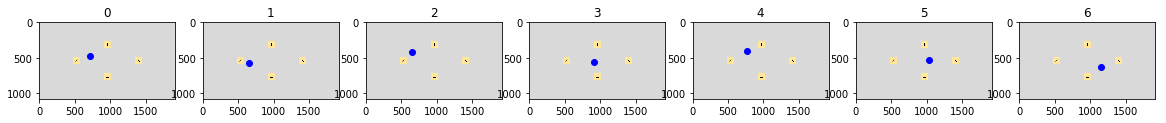

In [11]:
df_IVT['Time'] = time0
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
df_IVT['Time']=df_IVT['Time'].multiply(other = other) 

db = DBSCAN(eps=eps, min_samples=1).fit(df_IVT.values)
labels = db.labels_

from collections import Counter

print("counter:")
print(Counter(labels))

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print()
print("n_clusters_:")
print(n_clusters_)

r_clusters = [df_IVT.values[labels == i] for i in range(n_clusters_)]
print(r_clusters)

clusters = []
_ri = 0
for _c in r_clusters:
    _v = []
    if _ri in remFixIndex:
        _ri += 1
        continue
        
    for _cv in _c:
        _v.append(_cv)
    clusters.append(_v)
    _ri += 1

print()    
print("clusters:")
print(clusters)
print("len(clusters):")
print(len(clusters))

fig = plt.figure(figsize=(20, 20))
fig_sub = []
fig_sub_count=0

for i in range(1,len(clusters)+1):
    fig_sub.append(fig.add_subplot(9,7,i))
    fig_sub[i-1].title.set_text(i-1)
    fig_sub[i-1].set_xlim([0, 1920])
    fig_sub[i-1].set_ylim([1080, 0])
    fig_sub[i-1].imshow(img, extent=[0, 1920, 1080, 0])

DBSAN_IVT_IDX=[]
for i in range(1,len(clusters)+1):
    fig_sub_count+=1
    tmpres=[]
    for j in clusters[i-1]:
        fig_sub[fig_sub_count-1].scatter(j[0], j[1], c='b', marker='o')
        #tmpres.append(str(int(j[2]/other))+"/"+str(int(j[1]))+"/"+str(int(j[2])))
        tmpres.append(int(df_IVT[(df_IVT['X']==j[0])&(df_IVT['Y']==j[1])&(df_IVT['Time']==j[2])].index[0]))
    DBSAN_IVT_IDX.append(tmpres)

print()
print(DBSAN_IVT_IDX)

In [5]:
DBSAN_IVT_IDX
save_csv=[]
counts=[]

sub2d = np.asarray(data).reshape(len(data),6)
for CLUSTER_IDX in DBSAN_IVT_IDX:
    res=[]
    count=0
    for FIX_IDX in CLUSTER_IDX:
        for RAW_IDX in fixations[FIX_IDX]:
            res.append(str(sub2d[RAW_IDX,0])+"/"+str(sub2d[RAW_IDX,4])+"/"+str(sub2d[RAW_IDX,5]))
            count+=1
    res="/".join(res)
    save_csv.append(res)
    counts.append(count)
print(save_csv)  

['233531/958.2990599999999/345.977681/233532/938.6640560000001/343.138153/233533/936.135642/345.41166/233534/936.772483/346.37609399999997/233535/934.1713890000001/351.77013/233536/932.1846230000001/351.293501/233537/932.010318/349.818002/233538/932.010318/349.818002/233539/932.170647/347.669844/233540/932.367793/347.022195/233541/935.1267650000001/343.865043/233542/935.4995220000001/343.063915/233543/934.7806210000001/340.77592799999996/233544/932.495984/339.242931/233545/932.4110539999999/340.262628/233546/932.0482470000001/340.184068/233547/932.0482470000001/340.184068/233548/933.093486/338.728157/233549/933.6080400000001/336.099556/233550/933.2888429999999/336.803339/233551/932.7030359999999/335.950823/233552/928.734253/337.477566/233553/927.2713669999999/338.132971/233554/926.5098710000001/338.00731/233555/926.0716199999999/339.195921/233556/926.0716199999999/339.195921/233557/927.387824/342.546935/233558/929.2189369999999/343.77339700000005/233559/931.6967699999999/348.413821/233

In [6]:
maxd = max(counts)
print(maxd)
for i in range(len(counts)):
    counts[i]=counts[i]/maxd
d = {'data': save_csv, 'counts': counts}
csv_df = pd.DataFrame(d)
print(csv_df)
csv_df.to_csv("data/clusted_"+dataname,header=False,index=False)

562
                                                data    counts
0  233531/958.2990599999999/345.977681/233532/938...  0.802491
1                       233982/654.430146/581.701647  0.001779
2  233983/826.683653/566.603374/233984/850.255625...  0.005338
3                       233986/914.758818/557.042376  0.001779
4  233987/1030.465412/542.455709/233988/1030.4654...  0.005338
5                      233990/1029.828864/527.102806  0.001779
6  233991/1238.191213/538.662793/233992/1254.4868...  1.000000
